## Pandas读取Excel绘制直方图

***直方图(Histogram)：***  
直方图是数值数据分布的精确图形表示，是一个连续变量（定量变量）的概率分布的估计，它是一种条形图。   
为了构建直方图，第一步是将值的范围分段，即将整个值的范围分成一系列间隔，然后计算每个间隔中有多少值。 

### 1. 读取数据

波斯顿房价数据集

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("./datas/boston-house-prices/housing.xlsx")

In [3]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [5]:
df["MEDV"]

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

### 2. 使用matplotlib画直方图

matplotlib直方图文档：https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.pyplot.hist.html

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

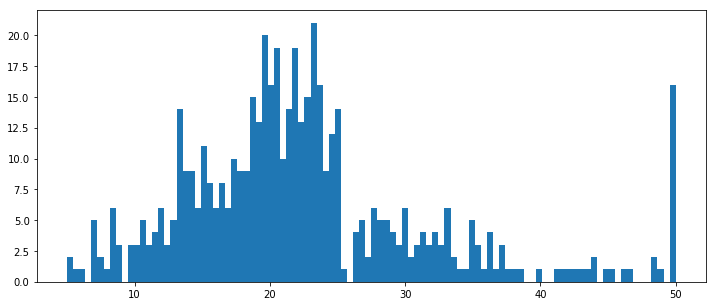

In [9]:
plt.figure(figsize=(12, 5))
plt.hist(df["MEDV"], bins=100)
plt.show()

### 3. 使用pyecharts画直方图

pyecharts直方图文档：http://gallery.pyecharts.org/#/Bar/bar_histogram  
numpy直方图文档：https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html

In [10]:
from pyecharts import options as opts
from pyecharts.charts import Bar

In [11]:
# 需要自己计算有多少个间隔、以及每个间隔有多少个值
hist,bin_edges =  np.histogram(df["MEDV"], bins=100)

In [12]:
# 这是每个间隔的分割点
bin_edges

array([ 5.  ,  5.45,  5.9 ,  6.35,  6.8 ,  7.25,  7.7 ,  8.15,  8.6 ,
        9.05,  9.5 ,  9.95, 10.4 , 10.85, 11.3 , 11.75, 12.2 , 12.65,
       13.1 , 13.55, 14.  , 14.45, 14.9 , 15.35, 15.8 , 16.25, 16.7 ,
       17.15, 17.6 , 18.05, 18.5 , 18.95, 19.4 , 19.85, 20.3 , 20.75,
       21.2 , 21.65, 22.1 , 22.55, 23.  , 23.45, 23.9 , 24.35, 24.8 ,
       25.25, 25.7 , 26.15, 26.6 , 27.05, 27.5 , 27.95, 28.4 , 28.85,
       29.3 , 29.75, 30.2 , 30.65, 31.1 , 31.55, 32.  , 32.45, 32.9 ,
       33.35, 33.8 , 34.25, 34.7 , 35.15, 35.6 , 36.05, 36.5 , 36.95,
       37.4 , 37.85, 38.3 , 38.75, 39.2 , 39.65, 40.1 , 40.55, 41.  ,
       41.45, 41.9 , 42.35, 42.8 , 43.25, 43.7 , 44.15, 44.6 , 45.05,
       45.5 , 45.95, 46.4 , 46.85, 47.3 , 47.75, 48.2 , 48.65, 49.1 ,
       49.55, 50.  ])

In [13]:
len(bin_edges)

101

In [12]:
# 这是间隔的计数
hist

array([ 2,  1,  1,  0,  5,  2,  1,  6,  3,  0,  3,  3,  5,  3,  4,  6,  3,
        5, 14,  9,  9,  6, 11,  8,  6,  8,  6, 10,  9,  9, 15, 13, 20, 16,
       19, 10, 14, 19, 13, 15, 21, 16,  9, 12, 14,  1,  0,  4,  5,  2,  6,
        5,  5,  4,  3,  6,  2,  3,  4,  3,  4,  3,  6,  2,  1,  1,  5,  3,
        1,  4,  1,  3,  1,  1,  1,  0,  0,  1,  0,  0,  1,  1,  1,  1,  1,
        1,  2,  0,  1,  1,  0,  1,  1,  0,  0,  0,  2,  1,  0, 16],
      dtype=int64)

In [13]:
len(hist)

100

#### 对bin_edges的解释，为什么是101个？比hist计数多1个？

举例：如果bins是[1, 2, 3, 4]，那么会分成3个区间：[1, 2)、[2, 3)、[3, 4]；  
其中bins的第一个值是数组的最小值，bins的最后一个元素是数组的最大值

In [14]:
# 注意观察，min是bins的第一个值，max是bins的最后一个元素
df["MEDV"].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [15]:
# 查看bins每一个值和前一个值的差值，可以看到这是等分的数据
np.diff(bin_edges)

array([0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45,
       0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45,
       0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45,
       0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45,
       0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45,
       0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45,
       0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45,
       0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45,
       0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45,
       0.45])

In [16]:
# 这些间隔的数目，刚好等于计数hist的数目
len(np.diff(bin_edges))

100

In [17]:
# pyecharts的直方图使用bar实现
# 取bins[:-1]，意思是用每个区间的左边元素作为x轴的值
bar = (
    Bar()
    .add_xaxis([str(x) for x in bin_edges[:-1]])
    .add_yaxis("价格分布", [float(x) for x in hist], category_gap=0)
    .set_global_opts(
        title_opts=opts.TitleOpts(title="波斯顿房价-价格分布-直方图", pos_left="center"),
        legend_opts=opts.LegendOpts(is_show=False)
    )
)

In [18]:
bar.render_notebook()

<b>小作业：</b>   
获取你们产品的销量数据、价格数据，提取得到一个一数组，画一个直方图看一下数据分布